Probability Distributions
=========================

In this chapter we will describe the most common discrete and continuous
probability distribution functions encountered in physics.

Basic combinatorics
-------------------

Let's start with some nomenclature and some basic results from combinatorics that will be needed for what follows.

Typically we will be talking about sequences of objects: a distinction
has to be made on whether we care or not about the order of the elements
in a sequence. If we care about the order we talk about
**permutations**, otherwise we talk about **combinations** (permutations
are ordered combinations).
```{admonition} Example:
:class: tip
take the set of letters $\{abc\}$. The sequences $\{cab\}$
and $\{bac\}$ are considered equivalent combinations but distinct
permutations.
```

#### Permutations with repetitions:
pick r objects from a set of n and put them back each time. The number
of permutations (ordered sequences) is:

$n^r$

```{admonition} Example:
:class: tip
A byte is a
sequence of 8 bits (0/1): the number of permutations with repetitions is
$2^8 = 256$. A lock with three digits (form 0 to 9) has $10^3$
permutations.
```

#### Permutations without repetitions:
pick r objects from a set of n and don't put them back. At each pick you
will have one less object to choose from, so the number number of
permutations is reduced with respect to $n^r$ (permutations with
repetitions). The number of permutations (ordered sequences) is:

$\frac{n!}{(n-r)!}$

```{admonition} Example:
:class: tip
take all permutations without
repetitions of the 52 cards in the deck: 52! (first pick you choose
among 52 cards, second pick among 51 etc\...). Take all permutations of
the first 4 picks in a deck of 52 cards:
$52\cdot51\cdot50\cdot49 = 52!/ (52-4)!$ (first you pick from 52, then
from 51, then from 50, then form 49).
```

#### Combinations without repetitions:
pick r objects from a set of n and don't put them back. At each pick you
will have less objects to choose from as for permutations, but this time
all sequences that differ only by their order are considered to be the
same. The number of combinations (non-ordered sequences) is the number
of permutations corrected by the factor that describes the number of
ordered sequences (i.e. r!):

$\frac{n!}{(n-r)!}\frac{1}{r!} = \binom{n}{r}$

These numbers are the
so-called binomial coefficients, which appear in the binomial theorem:

$(p+q)^n=\sum_{r=0}^{n}{n\choose r}\, p^r\cdot q^{n-r}$

An interesting
propertiy is that the number of combinations extracting r objects from n
or (n-r) from n is the same.

```{admonition} Example:
:class: tip
"lotto" (six-numbers lottery game): 6 numbers are extracted
(without putting them back) from a set of 90. The order of the
extraction is irrelevant. The probability to win (when all tickets are
sold) is $1/\binom{90}{6}$ =1.6 $10^{-9}$.
```

#### Combinations with repetitions:
pick r objects from a set of n and put them back. As in the case of
permutations with repetition but this time without considering the
order.

$\frac{(n+r-1)!}{(n-1)!r!} =  \binom{n+r-1}{r}$

```{admonition} Example:
:class: tip
take r-scoops from n-icecream flavours. You can take them all the same
or repeat them as you like (assuming there is enough icecream\...).
```

Derivation:

Start from an example: take 3 objects from a set of 5 (a,b,c,d,e).
Examples of those sequences are (a a b),$\;$ (a b c),$\;$ (c c c).
Now think about the sequences as ordered boxes filled with the letters:
one box for the a's, one box for the b's, etc\... I will use a separator
"$|$" instead of drawing boxes (this trick will become very important in
a second):\
(a a b) $\rightarrow$ a a $|$ b $|$ $\;$ $|$ $\;$ $|$ (the last three
are empty boxes corresponding to c, d, e)\
(a b c) $\rightarrow$ a $|$ b $|$ c $|$ $\;$ $|$ $\;$\
(c c c) $\rightarrow$ $\;$$|$ $\;$ $|$ c c c $|$ $\;$ $|$\
We can also drop the letters and replace them with "x", the position of
the box already tells which letter it correspnds to.\
e.g.: aab $\rightarrow$ a a $|$ b $|$ $\;$ $|$ $\;$ $|$ $\rightarrow$ x
x $|$ x $|$ $\;$ $|$ $\;$ $|$\
Considering "x" and "$|$" as objects (here is where the trick becomes
important), we can rephrase the problem as "in how many ways we can
place r = 3 "x" and n = 5-1 = 4 "$|$".
This is the same as the combination w/o repetition "N pick R", where in
this case:

N = n-1 + r (sum of all "$|$" and "x")
R = r
$\;\;\;\;\;\Rightarrow\binom{n-1+r}{r}$ 

[Derivation reference](https://www.mathsisfun.com/combinatorics/combinations-permutations.html)


For large $n$, the *Stirling formula* can be used to approximate $n!$:

$$
n! & \approx & \left(\frac{n}{e}\right)^n\sqrt{2\pi n}\\
\ln n! & \approx &  (n+1/2)\ln n-n+ln\sqrt{2\pi}
$$ 

The first term in the second line, $(n/e)^{n}$, is called the zero-th
approximation, whereas the whole term in the above equation is the first
approximation. The factorial $n!$ can be extended for non-integer
arguments $x$ by the gamma function $\Gamma(x)$:

$$
\begin{aligned}
x!&=&\int_0^\infty u^xe^{-u}du=\Gamma(x+1)\\
\Gamma(x+1)&=&x\Gamma(x)
\end{aligned}
$$

Discrete Distributions
----------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

### Bernoulli trials

A *Bernoulli trial* is an experiment with only two outcomes
(success/failure or 1/0) and where success will occur with constant
probability $p$ and failure with constant probability $q=1-p$. Examples
are again the coin toss, or (from particle physics) the decay of $K^{+}$ into either
$\mu^{+}\nu$ or any other channels. The random variable $r\in\{0,1\}$ is
the outcome of the experiment and its p.d.f. 
is: 

$$
f(r;p) = p^r~q^{(1-r)}
$$ 

The p.d.f. is simply the probability for a single experiment to give success/failure.
The first two moments of the distribution are: 

$$
\mu = p \\
V(r) = p(1-p)
$$

The distribution for a given value of p is:

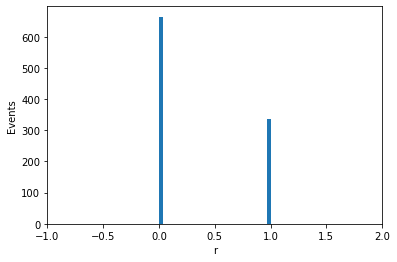

In [3]:
# Bernoulli trials for a fixed p = 0.3 and 1000 trials

r = 1000
p = 0.3
sample = np.random.binomial(1, p, r)

fig, ax = plt.subplots(1, 1)
ax.hist(sample, bins=30, density=False);
ax.set_ylabel('Events')
ax.set_xlabel('r')
ax.set_xlim(-1, 2);

### Binomial 

Given $n$ Bernoulli trials with a probability of success $p$, the
binomial distribution gives the probability to observe $r$ successes
and, consequently, $n-r$ failures independently of the order with which
they appear. The random variable is again $r$ but this time
$r\in\{0,n\}$, i.e. the maximum is given when all trials give a success.
The p.d.f. is: 

```{math}
:label: binomial
P(r;n,p)={n\choose r}\, p^r(1-p)^{n-r}.
```

Eq.{eq}`binomial` can be motivated in the following way: the probability that we get a
positive outcome in the first $r$ attempts and negative outcome in the
last $n-r$ attempts, is given by $p^{r} \cdot (1-p)^{n-r}$; but this
sequential arrangement is only one of a total of ${n \choose r}$
possible arrangements. The distribution for different values of the
parameters is plotted in the following figure:

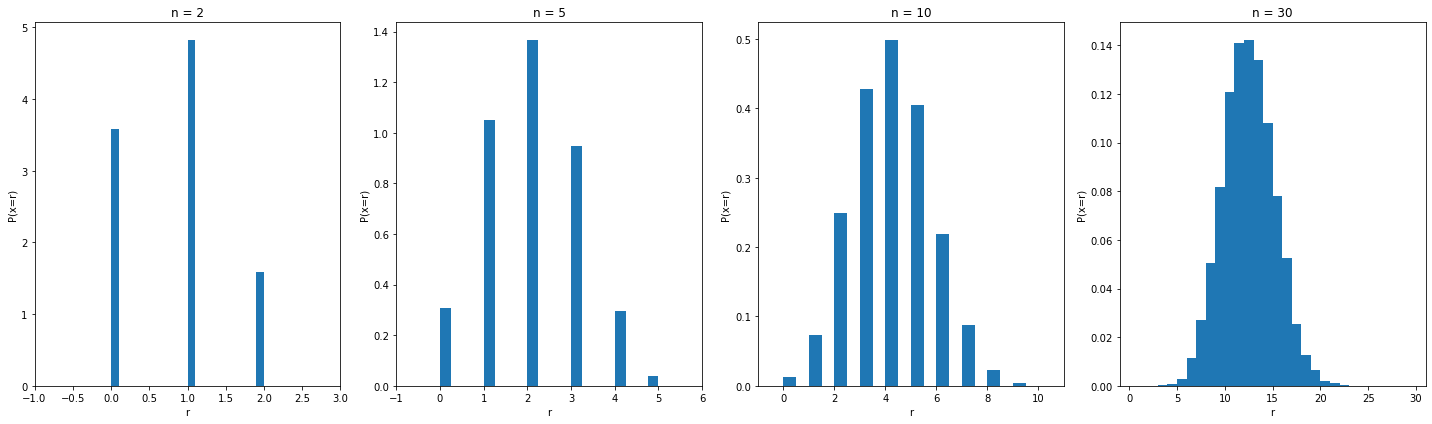

In [5]:
# The binomial distribution for a fixed p=0.4 and different values of n

p = 0.4
n = [2, 5, 10, 30]
repetitions = 10000

fig, ax = plt.subplots(1, len(n), figsize=(20, 6))
for i, N in enumerate(n):
    samples = np.random.binomial(N, p, repetitions)
    ax[i].hist(samples, bins=20, density=True);
    ax[i].set_xlim(-1, N+1)
    ax[i].set_title('n = {}'.format(N))
    ax[i].set_xlabel('r')
    ax[i].set_ylabel(r'P(x=r)')
plt.tight_layout()

The important properties of the binomial distribution are:

-   It is normalized to 1, i.e. $\sum_{r=0}^n P(r)=1.$

-   The mean of $r$ is $<r>=\sum_{r=0}^n r\cdot P(r)=np.$

-   The variance of $r$ is $V(r)=np(1-p).$

The binomial distribution (like several others we will encounter) has
the **reproductive property**. If $X$ is binomially distributed as
$P(X;n,p)$ and $Y$ is binomially distributed (with the same probability
$p$) as $P(Y;m,p)$, then the sum is binomially distributed as
$P(X+Y; n+m, p)$.


```{admonition} Example:
:class: tip
What is the probability to get out of 10 coin tosses 3 times a "head"? Solution:
$P(3; 10, 0.5)={10 \choose 3}\,0.5^3\cdot (1-0.5)^{10-3}=\frac{10!}{3!7!}0.5^3\cdot 0.5^7=0.12$
```

```{admonition} Example:
:class: tip
A detector with 4 layers has an efficiency per layer to
detect a traversing particle of 88%. To reconstruct the complete track
of the particle, we need at least three hits (i.e. three out of the four
layers have to detect the particle). What is the probability to
reconstruct the track?\
We need at least 3 hits (i.e. 3 or 4), so we have to sum the probability
to have 3 hits to the probability to have 4 hits:\
$P(r\ge 3; n=4, p=0.88) = P(r = 3; n=4, p=0.88) + P(r = 4; n=4, p=0.88) =$\
$0.33 + 0.60 = 0.93$

What if we have 3 or 5 layers?\
For 3 layers $= P(r = 3; n=3, p=0.88) = 0.68$\
For 5 layers $= P(r \ge 3; n=5, p=0.88) = 0.10 + 0.36 + 0.53 = 0.99$
```

### Multinomial Distribution

The precedent considerations can directly be generalized for the
multidimensional problem. Assume we have $n$ objects of $k$ different
types, and $r_{i}$ is the number of objects of type $i$. The number of
distinguishable arrangements is then given by
$\frac{n!}{r_1!r_2!\cdots r_k!}$.
If we now choose randomly

$$n = r_1 + r_2 + ... + r_k$$ 

objects (putting them back every time), then
the probability of getting an arrangement of $r_{1}$ objects of type
$1$, $r_{2}$ objects of type $2$, etc\... is given by
$p_1^{r_1}\cdot p_2^{r_2}\cdots p_k^{r_k}$. The overall probability is
therefore simply the probability of our arrangement, multiplied with the
number of possible distinguishable arrangements:

$$P(r_1,..,r_k;p_1,p_k)=\left(\frac{n!}{r_1!r_2!r_3!\cdots r_k!}\right)p_1^{r_1}\cdot p_2^{r_2}\cdots p_k^{r_k}.$$

This distribution is called the multinomial distribution and it is what
describes the probability to have $r_i$ events in bin i of a histogram
with $n$ entries. The corresponding properties are:

$$<r_i>=np_i \qquad \textrm{and} \qquad \; V(r_i)=np_i(1-p_i).$$ 

You can also compute the covariance among the bins of a histogram:

$$\mbox{cov}(r_i, r_j) = -n p_i p_j$$

and

$$\rho_{ij} = \frac{\mbox{cov}(r_i,r_j)}{\sigma_i \sigma_j} = -\sqrt{\frac{p_i}{1-p_i}\frac{p_j}{1-p_j}}$$

The correlation among bins comes from the fact that the total number of entries $n = r_1+\ldots+r_k$ is fixed, i.e. $r_i = n - r_1 - \ldots - r_{i-1} - r_{i+1} -\ldots - r_k .$

If n is not fixed, i.e. n is another random variable, the bin entries are
uncorrelated and instead of having a multinomial we will have a Poisson
for each bin (see also [extended maximum likelihood fit](./likelihood.html#sec:EMLF)).


### Poisson Distribution

The Poisson p.d.f. applies to the situations where we detect events but
do not know the total number of trials. An example is a radioactive
source where we detect the decays but do not detect the non-decays.\
The distribution can be obtained as a limit of the binomial: let
$\lambda$ be the probability to observe a radioactive decay in a period
$T$ of time. Now divide the period $T$ in $n$ time intervals
$\Delta T  = T/n$ small enough that the probability to observe two
decays in an interval is negligible. The probability to observe a decay
in $\Delta T$ is then $\lambda / n$, while the probability to observe
$r$ decays in the period $T$ is given by the binomial probability to
observe $r$ events in $n$ trials each of which has a probability
$\lambda / n$.

$$P\left(r; n,\frac{\lambda}{n} \right) = \frac{n!}{(n-r)!}\frac{1}{r!} \left( \frac{\lambda}{n}\right)^r \left( 1- \frac{\lambda}{n}  \right) ^{n-r} \label{eq:bin}$$

Under the assumption that $n >> r$ then:

$$\frac{n!}{(n-r)!} = n(n-1)(n-2)\dots(n-r+1) \sim n^r$$ 

and

$$\left( 1- \frac{\lambda}{n}  \right) ^{n-r} \sim \left( 1- \frac{\lambda}{n}  \right) ^{n} \to e^{-\lambda} \qquad \textrm{for} \qquad n \to \infty$$

we obtain the Poisson p.d.f:

$$P(r;\lambda) = \frac{\lambda^r e^{-\lambda}}{r!}.$$

The Poisson distribution can so be seen as the limit of the binomial
distribution when the number $n$ of trials becomes very large and the
probability $p$ for a single event becomes very small, while the product
$pn = \lambda$ remains a (finite) constant. It gives the probability of
getting $r$ events if the expected number (mean) is $\lambda$.

Properties of the Poisson distribution:

-   it is normalized to 1:
    $\sum_{r=0}^{\infty}P(r)=e^{-\lambda}\sum_{r=0}^{\infty}\frac{\lambda^r}{r!}=e^{-\lambda}e^{+\lambda}=1$

-   the mean $<r>$ is $\lambda$:
    $<r>=\sum_{r=0}^{\infty}r\cdot \frac{e^{-\lambda}\lambda^r}{r!}=\lambda$

-   the variance is $V(r)=\lambda$

-   $P(r+s;\lambda_r, \lambda_s) = \frac{(\lambda_r+\lambda_s)^{(r+s)} e^{-(\lambda_r+\lambda_s)}}{(r+s)!}$:
    the p.d.f. of the sum of two Poisson distributed random variables is
    also Poisson with $\lambda$ equal to the sum of the $\lambda$'s of
    the individual Poissons

```{margin}
This example is mentioned for the first time in the book from L.
von Bortkiewicz in the year 1898: \"Das Gesetz der kleinen Zahlen.\"
```

```{admonition} Example:
:class: tip
An historical example is the number of deadly horse
accidents in the Prussian army. The fatal incidents were registered over
twenty years in ten different cavalry corps. There was a total of 122
fatal incidents, and therefore the expectation value per corps per year
is given by $\lambda = 122/200 =0.61$. The probability that no soldier
is killed per year and corps is
$P(0;0.61) = e^{-0.61} \cdot 0.61^{0} / 0! = 0.5434$. To get the total
events (of no incidents) in one year and per corps, we have to multiply
with the number of observed cases (here 200), which yields
$200 \cdot 0.5434 = 108.7$. The total statistics of the Prussian cavalry
is summarized in the following table in agreement with the Poisson expectation:

|   Fatal incidents per corps and year |  Reported incidents  |  Poisson distribution |
| ------------------------------------ | -------------------- | ----------------------|
|                  0                   |        109           |       108.7 |
|                   1                  |          65          |         66.3 | 
|                   2                  |          22          |         20.2 |
|                   3                  |          3           |         4.1 |
|                   4                  |          1           |         0.6 | 

```



The Poisson distribution is very often used in counting experiments:

-   number of particles which are registered by a detector in the time
    interval $t$, if the flux $\Phi$ and the efficiency of the detector
    are independent of time and the dead time of the detector $\tau$ is
    sufficiently small, such that $\phi \tau \ll 1$

-   number of interactions caused by an intense beam of particles which
    travel through a thin foil

-   number of entries in a histogram, if the data are taken during a
    fixed time interval

-   number of flat tires when traveling a certain distance, if the
    expectation value flats / distance is constant

Some counter-examples, in which the Poisson distribution *cannot* be
used:

-   the decay of a small amount of radioactive material in a certain
    time interval, if this interval is comparable to the lifetime

-   the number of interactions of a beam of only a few particles which
    pass through a thick foil

In both cases we have the event rate is not constant (in the first it
decreases with time, in the second with distance) and therefore the
Poisson distribution cannot be applied.

The Poisson p.d.f. requires that the events be independent. Consider the
case of a counter with a dead time of 1 $\mu sec$. This means that if a
second particle passes through the counter within 1 $\mu sec$ after one
which was recorded, the counter is incapable of recording the second
particle. Thus the detection of a particle is not independent of the
detection of other particles. If the particle flux is low, the chance of
a second particle within the dead time is so small that it can be
neglected. However, if the flux is high it cannot be. No matter how high
the flux, the counter cannot count more than $10^6$ particles per
second. In high fluxes, the number of particles detected in some time
interval will not be Poisson distributed.

```{figure} ./images/ch2/PoissonDistJPG.jpg
---
width: 400px
align: center
name: fig-poisson
---
FIXME: The Poisson distribution for different values of $\lambda$.
```

Continuous Distributions
------------------------

### Uniform Distribution

The probability density function of the uniform distribution in the
interval $[a,b]$ is given by:

$$
f(x)= 
\begin{cases} 
\frac{1}{b-a} \quad &\text{if } a \le x \le b \\
                                0 &\text{else}.
\end{cases}
$$

The expectation value and the variance are given by 

$ <x> = \int_a^b\frac{x}{b-a}dx=\frac{1}{2}(a+b) $

$ \mbox{Var}(x) = \frac{1}{12}(b-a)^2 $

```{figure} ./images/ch2/uniform.png
---
width: 400px
align: center
name: fig-uniform
---
FIXME: Uniform distribution [wiki]
```

```{admonition} Example:
:class: tip
Consider a detector built as a single strip of silicon with
a width of 1mm. If a charged particle hits it, the detector reads 1
otherwise zero (binary readout). What is the spacial resolution of the
detector? Estimating the resolution as the variance of the corresponding
uniform distribution, we get $\sim 290\mu m$.
```

### Gaussian or Normal Distribution

The Gaussian or normal distribution is probably the most important
and useful distribution we know. The probability density function is

```{margin}
C.F. Gauss did not discovery it all alone. Independently, Laplace
and de Moivre knew about this distribution.
```

```{margin}
A legend says that Gauss did describe the size of bread loaves in
the city of Königsberg with the normal distribution.

```
$$
f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

The Gaussian distribution is described by two parameters: the mean value
$\mu$ and the variance $\sigma^{2}$ or the standard deviation $\sigma$.
By substituting $z = (x-\mu) / \sigma$ we obtain the so-called normal or
standardized Gaussian distribution:

$$
N(0,1)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}.
$$ 

It has an mean of zero and standard deviation 1.

Properties of the normal distribution are:

-   it is normalized to 1: $\int_{-\infty}^{+\infty}P(x;\mu,\sigma)dx=1$

-   $\mu$ is the first moment of the distribution:
    $\int_{-\infty}^{+\infty}xP(x;\mu,\sigma)dx=\mu$

-   being a symmetric distribution, $\mu$ is also its mode and median

-   its second central moment is $\sigma^2$:
    $\int_{-\infty}^{+\infty}(x-\mu)^2P(x;\mu,\sigma)dx=\sigma^2$

If $X$ and $Y$ are two independent r.v.'s distributed as
$f(x;\mu_x,\sigma_x)$ and $f(y;\mu_y,\sigma_y)$ then Z = X + Y is
distributed as $f(z;\mu_z,\sigma_z)$ with $\mu_z = \mu_x+\mu_y$ and
$\sigma_z^2 = \sigma_x^2 + \sigma_y^2$.

Some useful integrals, which are often used when working with the
Gaussian function: 

$$
\begin{aligned}
\int_{-\infty}^{+\infty}e^{-ax^2}dx & = & \sqrt{\pi/a}\\
\int_{0}^{+\infty}xe^{-ax^2}dx & = & \frac{1}{2a}\\
\int_{-\infty}^{+\infty}x^2e^{-ax^2}dx & = & \frac{1}{2a}\sqrt{\pi/a}\\
\int_{0}^{+\infty}x^{2n+1}e^{-ax^2}dx & = & \frac{n!}{2a^{n+1}}\\
\int_{-\infty}^{+\infty}x^{2n+1}e^{-ax^2}dx & = &0, \, \mbox{for all odd values of $n$} \\
\end{aligned}
$$

```{figure} ./images/ch2/GaussDist.png
---
width: 400px
align: center
name: fig-GaussDist
---
FIXME: The standardized Gaussian distribution. On the top graph the cumulative distribution function is shown, on the lower graph its probability distribution function.
```

Here are some numbers for the integrated Gaussian distribution:

-   68.27% of the area lies within $\pm\sigma$ around the mean $\mu$

-   95.45% lies within $\pm 2\sigma$ around the mean $\mu$

-   99.73% lies within $\pm 3 \sigma$ around the mean $\mu$

-   90% of the area lies within $\pm 1.645\sigma$ around the mean $\mu$

-   95% lies within $\pm 1.960\sigma$ around the mean $\mu$

-   99% lies within $\pm 2.576\sigma$ around the mean $\mu$

-   99.9% lies within $\pm 3.290\sigma$ around the mean $\mu$

The integrated Gaussian function $\Phi(x)$ can also be expressed by the
so-called error function $erf(x)$: 

$$
\begin{aligned}
\Phi(x)&=&\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{x}e^{-(t-\mu)^2/2\sigma^2}dt \\
erf(x)&=&\frac{2}{\sqrt{\pi}}\int_0^xe^{-t^2}dt \\
=>\Phi(x)&=&\frac{1}{2}\left(1+erf(\frac{x-\mu}{\sqrt{2}\sigma})\right)\\
\end{aligned}
$$

The *Full Width Half Maximum* (FWHM) is very useful to get a quick
estimate for the width of a distribution and for the specific case of
the Gaussian we have: $FWHM=2\sigma\sqrt{2\ln 2}=2.355\sigma.$ 
The Gaussian distribution is the limiting case for several other p.d.f.'s we
will encounter later (see (see {numref}`fig-limits`)). 
This is a consequence of the central limit theorem (CLT) (discussed in
[CLT](./probabilityDistributions.html#the-central-limit-theorem))


```{figure} ./images/ch2/limits.png
---
width: 600px
align: center
name: fig-limits
---
Limiting cases. FIXME ref Metzger
```

The N-dimensional Gaussian distribution is defined by

$$
f({\bf x};{\bf \mu}, V)=\frac{1}{(2\pi)^{N/2}|V|^{1/2}}\exp\left(-\frac{1}{2}({\bf x}-{\bf \mu})^TV^{-1}({\bf x}-{\bf \mu})\right).
$$

Here, ${\bf x}$ and ${\bf \mu}$ are column vectors with the components
$x_1,\ldots ,x_N$ and $\mu_1,\ldots ,\mu_N$, respectively. The
transposed vectors ${\bf x}^T$ and ${\bf \mu}^T$ are the corresponding
row vectors and $|V|$ is the determinant of the symmetric $N \times N$
covariance matrix $V$. The expectation values and the covariances are
given by:

-   $\langle x_i \rangle=\mu_i$

-   $\mbox{V}(x_i)=\mbox{V}_{ii}$

-   $\mbox{cov}(x_i,x_j)=\mbox{V}_{ij}$

In the simplified case of a two-dimensional Gaussian distribution we can
write 

$$
f(x_1,x_2;\mu_1\,\mu_2,\sigma_1,\sigma_2,\rho) = 
$$

$$
 \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \cdot \exp \left( -\frac{1}{2(1-\rho^2)}\right)
\cdot \left[\left(\frac{x_1-\mu_1}{\sigma_1}\right)^2 + 
\left(\frac{x_2-\mu_2}{\sigma_2}\right)^2
-2\rho\left(\frac{x_1-\mu_1}{\sigma_1}\right)
\left(\frac{x_2-\mu_2}{\sigma_2}\right)\right].
$$

We will come back to the specific case of the gaussian distribution in multiple
dimensions in the chapter [Measurement Uncertainties](./errors.html#a-closer-look-at-the-error-matrix-sec-errormatrix) when talking about the error matrix.

### $\chi^2$ Distribution

Assume that $x_{1}, x_{2}, \cdots, x_{n}$ are independent random
variables, which obey a Gaussian distribution. Then the joint p.d.f. is:

$$
\begin{aligned}
f({\bf x}; {\bf \mu}, {\bf \sigma}) &=& \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi} \sigma_i}\exp\left[-\frac{1}{2} \left( \frac{x_i - \mu_i}{\sigma_i}\right)^2 \right]\\
&=& \exp \left[ -\frac{1}{2} \sum_{i=1}^{n} \left( \frac{x_i - \mu_i}{\sigma_i}\right)^2 \right]  \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi} \sigma_i}
\end{aligned}
$$

Then the variable $\chi^{2}(n)$ defined as

$$
\chi^2(n)=\sum_{i=1}^{n}\left(\frac{x_i-\mu_i}{\sigma_i}\right)^2
$$

being a function of random variables is itself a random variable
distributed as a $\chi^{2}$ distribution with $n$ degrees of freedom.
The probability density is given by (see {numref}`fig-chi2`):
$$
\chi^2(n) = f(\chi^2;n) = \frac{(\chi^2)^{n/2-1}e^{-\chi^2/2}}{\Gamma(n/2)2^{n/2}}.
$$

```{figure} ./images/ch2/chi2.png
---
width: 400px
align: center
name: fig-chi2
---
FIXME: The $\chi^2$ distribution for different degrees of freedom.
```

The $\chi^2(n)$ p.d.f. has the properties:

-   mean = $n$

-   variance = $2n$

-   mode = n-2 for $n\ge2$ and 0 for $n\le2$

-   reproductive property:
    $\chi^2_{n_1+n_2} = \chi^2_{n_1} + \chi^2_{n_2} = \chi^2(n_1+n_2)$

Since the expectation of $\chi^2(n)$ is $n$, the expectation of
$\chi^2(n)/n$ is 1. The quantity $\chi^2(n)/n$ is called "reduced
$\chi^2$".

For $n \to \infty$, $\chi^{2}(n)\to N(\chi^2;n,2n)$ becomes a normal
distribution. When using the $\chi^{2}$-distribution in practice, the
approximation by a normal distribution is already sufficient for
$n \ge 30$.

To understand the notation take the particular case of the $\chi^2$ for
1 degree of freedom. Let $z = (x-\mu)/\sigma$ so that the p.d.f. for $z$
is $N(z; 0, 1)$ and the probability that $z \le Z \le z + dz$ is:

$$
f(z)dz = \frac{1}{\sqrt2\pi} e^{-\frac{1}{2} z^2 }dz.
$$

Let $Q = Z^2.$ (We use Q here instead of $\chi^2$ to emphasize that this is the
variable.) This is not a one-to-one transformation because both $+Z$ and
$-Z$ go into $+Q$.

The probability that $Q$ is between $q$ and $q + dq$ is the sum of the
probability that $Z$ is between $z$ and $z + dz$ around $z = \sqrt{q}$,
and the probability that $Z$ is between $z$ and $z -dz$ around
$z = -\sqrt{q}$. The Jacobian is:

$$
J_{\pm} = \frac{d(\pm z)}{dq} = \pm \frac{1}{2\sqrt{q}}
$$ 

so

$$
f(q)dq=  \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}q}(|J_+| + |J_-|) dq  =  \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}q}(\frac{dq}{2\sqrt{q}} + \frac{dq}{2\sqrt{q}}) dq = \frac{1}{\sqrt{2\pi q}} e^{-\frac{1}{2}q} dq
$$

Replacing $\chi^2$ for $Q$ we have:

$$
\chi^2(1) = \frac{1}{\sqrt{2\pi\chi^2}}e^{-\frac{1}{2} \chi^2}
$$

(careful! the same symbol is used for the random variable and the p.d.f.).

### Log-Normal Distribution

If $y$ obeys a normal distribution with mean $\mu$ and standard
deviation $\sigma$, then it follows that $x=e^{y}$ obeys a log-normal
distribution. This means that $\ln(x)$ is normal distributed  (see {numref}`fig-logNorm`):

$$
f(x; \mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{x}e^{-(\ln x-\mu)^2/2\sigma^2}.
$$

```{figure} ./images/ch2/logNorm.png
---
width: 400px
align: center
name: fig-logNorm
---
FIXME: The log-normal distribution for different values of the defining parameters. [wiki]
```

The expectation value and the variance are given by: 

$$
\begin{aligned}
<x>&=&e^{(\mu+\frac{1}{2}\sigma^2)} \\
\mbox{Var}(x)&=&e^{(2\mu+\sigma^2)}(e^{\sigma^2}-1)
\end{aligned}
$$ 

The log-normal distribution is typically used when the resolution of a
measurement apparatus is composed by different sources, each
contributing a (multiplicative) amount to the overall resolution. As the
*sum* of many small contributions of any random distribution converges
by the central limit theorem to a Gaussian distribution, so the
*product* of many small contributions is distributed according to a
log-normal distribution.

```{admonition} Example:
:class: tip
Consider the signal of a photomultiplier (PMT), which
converts light signals into electric signals. Each photon hitting the
photo-cathode emits an electron, which gets accelerated by an electric
field generated by an electrode (dynode) behind. The electron hits the
dynode and emits other secondary electrons which gets accelerated to the
next dynode. This process if repeated several times (as many as the
number of dynodes in the PMT). At every stage the number of secondary
electrons emitted depends on the voltage applied. If the amplification
per step is $a_{i}$, then the number of electrons after the $k^{th}$
step, $n_{k} = \Pi_{i=0}^{k} a_{i}$, is approximately log-normal
distributed.
```

### Exponential Distribution

The exponential distribution  (see {numref}`fig-exponential`):
is defined for a continuous variable $t$ ($0 \le t \le \infty$) by:

$$
f(t,\tau)=\frac{1}{\tau}e^{-t/\tau}.
$$

```{figure} ./images/ch2/exponential.png 
---
width: 200px
align: center
name: fig-exponential
---
```

```{figure} ./images/ch2/exponentialLog.png 
---
width: 200px
align: center
name: fig-exponentialLog
---
FIXME: The exponential distribution for different values of $\tau$ (top: linear, bottom: logarithmic scale.
```
The probability density is characterized by one single parameter $\tau$.

-   The expectation value is
    $\langle t \rangle=\frac{1}{\tau}\int_0^{\infty}te^{-t/\tau}dt=\tau.$

-   The variance is $\mbox{Var}(t)=\tau^2$.

An example for the application of the exponential distribution is the
description of the proper-decay-time decay $(t)$ of an unstable
particles. The parameter $\tau$ corresponds in this case to the mean
lifetime of the particle.

### Gamma Distribution

The gamma distribution (see {numref}`fig-gamma`) is given by:

$$
f(x;k,\lambda)=\lambda^{k}\frac{x^{k-1}e^{-\lambda x}}{\Gamma(k)}.
$$

```{figure} ./images/ch2/gamma.png 
---
width: 400px
align: center
name: fig-gamma
---
FIXME: The gamma distribution for different values of the parameters.
```

-   The expectation value is $<x> = k / \lambda$.

-   The variance is $\sigma ^{2} = k / \lambda^{2}$.

Special cases:

-   for $\lambda = 1/2$ and $k=n/2$ the gamma distribution has the form
    of a $\chi^2$ distribution with n degrees of freedom.

The Gamma distribution describes the distribution of the time $t=x$
between the first and the $k^{th}$ event in a Poisson process with mean
$\lambda$. The parameter $k$ influences the shape of the distribution,
whereas $\lambda$ is just a scale parameter.

### Student's $t$-distribution 

The Student's $t$ distribution is used when the standard deviation
$\sigma$ of the parent distribution is unknown and the one evaluated
from the sample $s$ is used. Suppose that $x$ is a random variable
distributed normally (mean $\mu$, variance $\sigma^{2}$), and a
measurement of $x$ yields the sample mean $\bar{x}$ and the sample
variance $s^{2}$. Then the variable $t$ is defined as

```{math}
:label: DefiningEquationVariableT
t = \frac{(\bar{x} - \mu) / \sigma}{s / \sigma} = \frac{\bar{x} - \mu}{s}.
```

You can see that we have canceled
our ignorance about the standard deviation of the parent distribution by
taking the ratio. The net effect is to substitute $\sigma$ with the
estimated $s$.\
The quantity $t$ follows the p.d.f. $f_n(t)$ with $n$ degrees of freedom
(see {numref}`fig-student`):

$$
f_n(t)=\frac{1}{\sqrt{n\pi}}\frac{\Gamma((n+1)/2)}{\Gamma(n/2)}\left(1+\frac{t^2}{n}\right)^{-(n+1)/2}
$$

If the true mean $\mu$ is known, then $n = N$ with $N$ being the number
of measurements, if the true mean is unknown then $n = N -1$ because one
degree of freedom is used for the sample mean $\bar{x}$.

```{figure} ./images/ch2/student.png 
---
width: 400px
align: center
name: fig-student
---
FIXME: The Student's distribution for different values of $n$.
```

The distribution depends only on the sample mean $\bar{x}$ and the
sample variance $s$.

In general, the variable: 

$$
T=\frac{Z}{\sqrt{S^2/n}}
$$

is governed by the Student's t distribution for n degrees of freedom if $Z$ and $S^2$
are two independent random variables following respectively a normal
distribution $\mathcal{N}(0,1)$ and the $\chi^2$ distribution
$\chi^2(n)$ with n degrees of freedom.

### $F$-distribution 

Consider two random variables, $\chi_1^2$ and $\chi_2^2$, distributed as
$\chi^2$ with $\nu_1$ and $\nu_2$ degrees of freedom, respectively. We
define a new random variable $F$ as:

$$
F = \frac{\chi_1^2/\nu_1}{\chi_2^2/\nu_2}
$$

The random variable $F$ follows the distribution (see {numref}`fig-Fdist`):

$$
f(F)=\left(\frac{n_1}{n_2}\right)^{n_1/2}\cdot \frac{\Gamma((n_1+n_2)/2)}{\Gamma(n_1/2)\Gamma(n_2/2)}\cdot F^{(n_1-2)/2}\left(1+\frac{n_1}{n_2}F\right)^{-(n_1+n_2)/2}.
$$

```{figure} ./images/ch2/Fdist.png 
---
width: 400px
align: center
name: fig-Fdist
---
FIXME:The F-distribution distribution for different values of the parameters. [wiki]
```

This distribution is known by many names: Fisher-Snedecor distribution,
Fisher distribution, Snedecor distribution, variance ratio distribution,
and $F$-distribution. By convention, one usually puts the larger value
on top so that $F \ge 1$.\
The $F$ distribution is used to test the statistical compatibility
between the variances of two different samples, which are obtained form
the same underlying distribution (more in [Hypothesis testing](./hypothesisTesting.html#f-test)).

### Weibull Distribution

The Weibull distribution (see {numref}`fig-weibull`) was originally invented to describe the rate of failures of light bulbs:

$$
P(x;\alpha,\lambda)=\alpha\lambda(\lambda x)^{\alpha-1}e^{-(\lambda x)^{\alpha}}.
$$

```{figure} ./images/ch2/weibull.png 
---
width: 400px
align: center
name: fig-weibull
---
FIXME: The Weibull distribution for different values of the parameters. [wiki]
```

with $x\ge 0$ and $\alpha, \lambda > 0$. The parameter $\alpha$ is just
a scale factor and $\lambda$ describes the width of the maximum. The
exponential distribution is a special case $(\alpha = 1)$, when the
probability of failure at time t is independent of t. The Weibull
distribution is very useful to describe the reliability and to predict
failure rates. The expectation value of the Weibull distribution is
$\Gamma(\frac{1}{\alpha}+1) \frac{1}{\lambda}$ and the variance is
$\frac{1}{\lambda^2} \left( \Gamma\left(\frac{2}{\alpha} +1\right) - \Gamma^2\left(\frac{1}{\alpha} +1\right) \right)$.

### Cauchy (Breit-Wigner) Distribution

The Cauchy probability density function is:

$$
f(x)=\frac{1}{\pi}\frac{1}{1+x^2}.
$$ 

For large values of $x$ it decreases only slowly. Neither the mean nor the variance are defined,
because the corresponding integrals are divergent. The particular Cauchy
distribution of the form

$$
f(m;M,\Gamma)=\frac{1}{2\pi}\frac{\Gamma}{(m-M)^2+(\Gamma/2)^2}
$$

```{figure} ./images/ch2/BW.png 
---
width: 400px
align: center
name: fig-BW
---
FIXME: The Breit-Wigner distribution for different values of the parameters. [wiki]
```

is also called Breit-Wigner function (see {numref}`fig-BW`), and is
used in particle physics to describe cross sections near a resonance
with mass $M$ and width $\Gamma$. The Breit-Wigner comes as the
Fourier transformation of the wave function of an unstable particle:

```{margin}
Even if the mean does not exist, noting that the distribution is
    symmetric, we can define it to be $M$; $\Gamma$ is the FWHM. In
    actual physical problems the distribution is truncated, e.g., by
    energy conservation, and the resulting distribution is well-behaved.
```

$$
\psi(t) \propto e^{-i E_i t /\hbar} e^{-\Gamma t /2}
$$

$$
\phi(\omega)\propto \int_0^\infty \psi(t) e^{i \omega t} dt = \frac{i}{(\omega - \omega_0 + i \frac{\Gamma}{2}) }
$$

which squared gives:

$$
|\phi(\omega)|^2 = \frac{1}{(\omega-\omega_0)^2 + \frac{\Gamma^2}{4}}.
$$

### Landau Distribution

The Landau distribution (see {numref}`fig-landau`)
is used to describe the distribution of the energy loss $x$
(dimensionless quantity proportional to $dE$) of a charged particle (by
ionisation) passing through a thin layer of matter:

$$
p(x) = \frac{1}{2\pi i} \int_{c-i\infty}^{c+i\infty} \exp(s\log s + xs)ds \qquad  (c > 0).
$$

The long tail towards large energies models the large energy loss
fluctuations in thin layers. The mean and the variance of the
distribution are not defined.\
Often it can be found approximated as:

$$
p(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} \left( x+ e^{-x} \right) }
$$

```{figure} ./images/ch2/landau.png 
---
width: 400px
align: center
name: fig-landau
---
FIXME: Straggling functions in silicon for 500 MeV pions, normalized to unity at the most probable value $\delta p/x$. The width $w$ is the full width at half maximum. [PDGStatistics]
```


### Crystal Ball

The Crystal Ball is typically used to describe the invariant mass
distribution of a resonance in which the decay products are affected by
energy losses. An example could be a $Z\to e^+ e^-$ where the electrons
in the final state lose energy by brehmstralung. The distribution is
characterized by a Gaussian core with a power law tail (see {numref}`fig-crystalball`) 

$$
f(x) = N \cdot
\begin{cases}
    e^{-\frac{(x-\mu)^2}{2\sigma^2}} ,                    & \text{if } \frac{x-\mu}{\sigma} > -\alpha \\
    A \cdot \left( B - \frac{x-\mu}{\sigma}\right)^{-n},  &  \text{if } \frac{x-\mu}{\sigma} \leq -\alpha
\end{cases}
$$ 

where: 

$$
\begin{aligned}
 A &=& \left( \frac{n}{|\alpha|} \right)^n \cdot \exp\left( -\frac{|\alpha|^2}{2}\right)     \\
 B &=& \frac{n}{|\alpha|} - |\alpha|\end{aligned}
$$ 
 
A trivial extension is given by the "Double Crystal Ball" where a second exponential tail is
added on the high side. 

$$
f(x) = N \cdot
\begin{cases}
    e^{-\frac{(x-\mu)^2}{2\sigma^2}} ,                      &  \text{if } \alpha_1 < \frac{x-\mu}{\sigma} < \alpha_2 \\
    A \cdot \left( B - \frac{x-\mu}{\sigma}\right)^{-n_1},  &  \text{if } \frac{x-\mu}{\sigma} \leq \alpha_1\\
    C \cdot \left( D - \frac{x-\mu}{\sigma}\right)^{-n_2},  &  \text{if } \frac{x-\mu}{\sigma} \geq \alpha_2
\end{cases}
$$ 

where: 

$$\begin{aligned}
 A &=& \left( \frac{n_1}{|\alpha_1|} \right)^{n_1} \cdot \exp\left( -\frac{|\alpha_1|^2}{2}\right)     \\
 B &=& \frac{n_1}{|\alpha_1|} - |\alpha_1| \\
 C &=& \left( \frac{n_2}{|\alpha_2|} \right)^{n_2} \cdot \exp\left( -\frac{|\alpha_2|^2}{2}\right)     \\
 D &=& \frac{n_2}{|\alpha_2|} - |\alpha_2|\end{aligned}
$$ 

In case you are wondering, the name comes from the collaboration that first used
this function to describe a signal distribution. [@crystalBall].

```{figure} ./images/ch2/crystalball.png 
---
width: 400px
align: center
name: fig-crystalball
---
FIXME: The Breit-Wigner distribution for different values of the parameters. [wiki]
```

Characteristic Function
-----------------------

The *characteristic function* $\Phi(t)$ is defined as the expectation
value of $e^{itx}$ for a p.d.f. $f(x)$:

$$
\Phi(t):=<e^{itx}>=\int e^{itx}\cdot f(x)dx
$$ 

i.e $\Phi(t)$ is the Fourier integral of f(x). The characteristic function completely
determines the p.d.f., since by inverting the Fourier transformation we
regain $f(x)$: 

$$
f(x)=\frac{1}{2\pi}\int e^{-itx}\cdot \Phi(t)dt
$$

The
characteristic function as well as its first and second derivative are
readily calculated for the special case where $t=0$: 

$$
\begin{aligned}
\Phi(0)&=&1 \\
\frac{d\Phi(0)}{dt}&=&i<x> \\
\frac{d^2\Phi(0)}{dt^2}&=&-(\sigma^2+<x>^2)
\end{aligned}
$$ 

What do we
need characteristic functions for? They may be useful when performing
calculations with probability densities, for example if the convolution
of two probability densities $f_{1}$ and $f_{2}$ for two random
variables $x_{1}$ and $x_{2}$ should be calculated. A convolution of
$f_{1}$ and $f_{2}$ yields a new probability density $g(y)$, according
to which the sum of the random variable $y = x_{1} + x_{2}$ is
distributed:

$$
g(y)=\int \int f_1(x_1)f_2(x_2)\delta(y-x_1-x_2)dx_1dx_2=\int f_1(x_1)f_2(y-x_1)dx_1=\int f_2(x_2)f_1(y-x_2)dx_2
$$

The convolution integral can now be transformed with the help of the
characteristic functions: 

$$
\Phi_g(t)=\Phi_{f_1}(t)\cdot\Phi_{f_2}(t)
$$

In words: the characteristic function of the convolution of two
variables is obtained by the product of their characteristic functions.
Thus it can be easily shown that the convolution of two Gaussian
distributions with $\mu_{1,2}$ and $\sigma_{1,2}$ is again a Gaussian
distribution with $\mu = \mu_{1} + \mu_{2}$ and
$\sigma^{2} = \sigma_{1}^{2} + \sigma_{2}^{2}$. Furthermore, the
convolution of two Poisson distributions is again a Poisson
distribution. The characteristic functions of some probability densities
are:

|     Distribution         |       Characteristic Function          |
|  ---                     | ---                                    |
|         Binomial         |        $\Phi(t)=(pe^{it}+q)^n$         |
|          Poisson         |    $\Phi(t)=e^{\lambda(e^{it}-1)}$     |
|           Gauss          |   $\Phi(t)=e^{i\mu t-t^2\sigma^2/2}$   |
|         $\chi^2$         |        $\Phi(t)=(1-2it)^{-n/2}$        |
|   Uniform (from a to b)  | $\Phi(t)=(e^{ibt}-e^{iat})/(b-a)^{it}$ |
|       Breit-Wigner       |   $\Phi(t)=e^{-iE_0t-(\Gamma/2)|t|}$   |
|           Gamma          |     $\Phi(t)=(1-it/\mu)^{-\alpha}$     |


The Central Limit Theorem
-----------------------

The "Central Limit Theorem" (CLT) is probably the most important theorem
in statistics and it is the reason why the Gaussian distribution is so
important.\
Take $n$ independent variables $x_i$, distributed according to p.d.f.'s
$f_i$ having mean $\mu_i$ and variance $\sigma_i^2$, then the p.d.f. of
the sum of the $x_i$, $S=\sum x_i$, has mean $\sum \mu_i$ and variance
$\sum\sigma_i^2$ and it approaches the normal p.d.f.
$N(S; \sum \mu_i, \sum \sigma_i^2)$ as $n\to \infty$.\
The CLT holds under pretty general conditions:

-   both mean and variance have to exist for each of the random
    variables in the sum

-   Lindeberg criteria: 

    $$
    \begin{aligned}
    y_k &=&  x_k,\quad {\rm if}\, |x_k-\mu_k|\le \epsilon_k\sigma_k \\
    y_k &=&   0,\quad {\rm if}\, |x_k-\mu_k|> \epsilon_k\sigma_k.
    \end{aligned}
    $$
    
    Here, $\epsilon_{k}$ is an arbitrary number. 
    If the variance $(y_{1}+y_{2}+\cdots y_{n})/ \sigma_{y}^{2} \to 1$ for
    $n \to \infty$, then this condition is fulfilled for the CLT. In
    plain English: The Lindeberg criteria ensures that fluctuations of a
    single variable does not dominate its sum.

An example of convergence for the CLT is given in {numref}`fig-CLT` where a
uniform distribution is used for 4 iterations.

```{figure} ./images/ch2/CLT.png 
---
width: 400px
align: center
name: fig-CLT
---
FIXME: Sum of random variables from a uniform distribution in $[-2,2]$ after the iterations 1 to 4.
```

When performing measurements the value obtained is usually affected by a
large number of (hopefully) small uncertainties. If this number of small
contributions is large the C.L.T. tells us that their total sum is
Gaussian distributed. This is often the case and is the reason
resolution functions are usually Gaussian. But if there are only a few
contributions, or if a few of the contributions are much larger than the
rest, the C.L.T. is not applicable, and the sum is not necessarily
Gaussian.

```{admonition} Example:
:class: tip
The inverse transverse momentum $q/p_T$, with q the charge of
the particle, can be deduced from the measured sagitta. $Q/p_T$ has
Gaussian errors, not $p_T$ !
```

References
----------

Pretty much every book about statistics/probability will cover the
material of this chapter. Here are a few examples:

-   L. Lyons [@Lyons], "Statistics for Nuclear and Particle Physicist":
    Ch. 3

-   W. Metzger [@Metzger], "Statistical Methods in Data Analysis": Ch.2

-   PDG [@PDG], Probability

-   PDG [@PDG], Passage of particles through matter
